In [85]:
import pandas as pd
import numpy as np
from decision_module import DecisionModuleOnline
import matplotlib.pyplot as plt

In [86]:
online_decision = DecisionModuleOnline()

In [87]:
estimated_score = pd.read_csv("trans_data/eval_out.csv")

In [88]:
n = len(estimated_score)

In [89]:
S = sum(estimated_score['label'])

In [90]:
scores = estimated_score['label'].values
scores.sort()

In [91]:
for drop_ratio in np.arange(0.01, 1, 0.01):
    print(drop_ratio, sum(scores < online_decision.params[drop_ratio]) / n)

0.01 0.00988
0.02 0.019855
0.03 0.029585
0.04 0.03967
0.05 0.049555
0.060000000000000005 0.059515
0.06999999999999999 0.06943
0.08 0.079175
0.09 0.089155
0.09999999999999999 0.099135
0.11 0.109125
0.12 0.118955
0.13 0.12884
0.14 0.138785
0.15000000000000002 0.14916
0.16 0.15912
0.17 0.16904
0.18000000000000002 0.179055
0.19 0.188875
0.2 0.199015
0.21000000000000002 0.20909
0.22 0.219315
0.23 0.229295
0.24000000000000002 0.239375
0.25 0.24928


KeyboardInterrupt: 

In [95]:
dropped_scores = []
drop_ratios = []
best_scores = []
for drop_ratio in np.arange(0.01, 1, 0.01):
    indicator = (estimated_score['label'].apply(lambda score, drop_ratio: online_decision.decide(score, drop_ratio), args=[drop_ratio]))
    dropped_ratio = sum(indicator) / n
    drop_ratios.append(dropped_ratio)
    dropped_score = sum(estimated_score[indicator]['label'])
    best_scores.append(sum(scores[:int(n * drop_ratio)]) / S)
    dropped_scores.append(dropped_score / S)
    print("drop ratio {}, drop ratio of our model {:.4f}, dropped score of our model {:.4f}, best {:.4f}".format(drop_ratio, drop_ratios[-1], dropped_scores[-1], best_scores[-1]))

drop ratio 0.01, drop ratio of our model 0.0099, dropped score of our model 0.0000, best 0.0000
drop ratio 0.02, drop ratio of our model 0.0199, dropped score of our model 0.0001, best 0.0001
drop ratio 0.03, drop ratio of our model 0.0296, dropped score of our model 0.0001, best 0.0001
drop ratio 0.04, drop ratio of our model 0.0397, dropped score of our model 0.0002, best 0.0002
drop ratio 0.05, drop ratio of our model 0.0496, dropped score of our model 0.0003, best 0.0003
drop ratio 0.060000000000000005, drop ratio of our model 0.0595, dropped score of our model 0.0004, best 0.0004
drop ratio 0.06999999999999999, drop ratio of our model 0.0694, dropped score of our model 0.0005, best 0.0005
drop ratio 0.08, drop ratio of our model 0.0792, dropped score of our model 0.0007, best 0.0007
drop ratio 0.09, drop ratio of our model 0.0892, dropped score of our model 0.0009, best 0.0009
drop ratio 0.09999999999999999, drop ratio of our model 0.0991, dropped score of our model 0.0011, best 0

drop ratio 0.8400000000000001, drop ratio of our model 0.8397, dropped score of our model 0.3578, best 0.3583
drop ratio 0.85, drop ratio of our model 0.8497, dropped score of our model 0.3770, best 0.3777
drop ratio 0.86, drop ratio of our model 0.8599, dropped score of our model 0.3976, best 0.3978
drop ratio 0.87, drop ratio of our model 0.8697, dropped score of our model 0.4182, best 0.4188
drop ratio 0.88, drop ratio of our model 0.8802, dropped score of our model 0.4413, best 0.4408
drop ratio 0.89, drop ratio of our model 0.8900, dropped score of our model 0.4638, best 0.4639
drop ratio 0.9, drop ratio of our model 0.9001, dropped score of our model 0.4890, best 0.4888
drop ratio 0.91, drop ratio of our model 0.9099, dropped score of our model 0.5154, best 0.5155
drop ratio 0.92, drop ratio of our model 0.9198, dropped score of our model 0.5428, best 0.5435
drop ratio 0.93, drop ratio of our model 0.9298, dropped score of our model 0.5740, best 0.5746
drop ratio 0.94000000000000

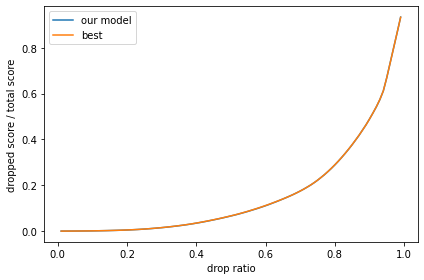

In [94]:
fig, ax = plt.subplots()
ax.plot(np.arange(0.01, 1, 0.01), dropped_scores, label='our model')
ax.plot(np.arange(0.01, 1, 0.01), best_scores, label='best')
ax.set_ylabel("dropped score / total score")
ax.set_xlabel('drop ratio')
ax.legend()
fig.tight_layout()
plt.show()